In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# plots
import seaborn as sns
import matplotlib.pyplot as plt

#classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

#feature selection
from sklearn.feature_selection import SelectKBest, chi2 , f_classif , f_regression

%matplotlib inline

In [2]:
# import data
df_features = pd.read_csv('x_train_gr_smpl.csv') #read features csv as dataframe
df_classes = pd.read_csv('y_train_smpl.csv') #read classes csv as dataframe
df_classes.columns = ['class'] #rename classes header to 'class'
df_concat = pd.concat([df_features,df_classes],axis=1) #concatinate features dataframe with class dataframe column

In [3]:
df_concat.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,class
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0,0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0,0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0,0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0,0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0,0
5,27.0,27.0,28.0,27.0,26.0,24.0,24.0,23.0,23.0,23.0,...,35.0,36.0,38.0,39.0,40.0,38.0,36.0,35.0,36.0,0
6,24.0,24.0,24.0,25.0,25.0,26.0,25.0,23.0,21.0,21.0,...,37.0,37.0,37.0,37.0,38.0,38.0,36.0,35.0,34.0,0
7,24.0,25.0,25.0,23.0,22.0,22.0,22.0,22.0,22.0,22.0,...,34.0,34.0,37.0,41.0,40.0,40.0,41.0,35.0,31.0,0
8,20.0,21.0,22.0,21.0,21.0,21.0,20.0,20.0,22.0,22.0,...,35.0,34.0,35.0,37.0,35.0,35.0,37.0,35.0,34.0,0
9,20.0,20.0,21.0,20.0,19.0,18.0,18.0,18.0,18.0,19.0,...,32.0,37.0,39.0,36.0,38.0,38.0,35.0,35.0,36.0,0


In [4]:
df_concat['class'].value_counts() #find how many pictures each class has

5    2160
4    2100
8    2070
1    1860
0    1410
3    1320
6     780
2     420
9     300
7     240
Name: class, dtype: int64

In [5]:
np.random.seed(0) #use the same random sample each time

In [6]:
class7_lenght = len(df_concat[df_concat['class']==7]) #take the lenght of the smallest class (class7)
indices_class7 = df_concat[df_concat['class']==7].index #take the indices of the class7 images

In [7]:
# random indices class 5
indices_class5 = df_concat[df_concat['class']==5].index #take the indices of the class5 images
random_class5_indices = np.random.choice(indices_class5,class7_lenght, replace=False) #take 240 random indices from class5

In [8]:
# random indices class 4
indices_class4 = df_concat[df_concat['class']==4].index
random_class4_indices = np.random.choice(indices_class4,class7_lenght, replace=False)

In [9]:
# random indices class 8
indices_class8 = df_concat[df_concat['class']==8].index
random_class8_indices = np.random.choice(indices_class8,class7_lenght, replace=False)

In [10]:
# random indices class 1
indices_class1 = df_concat[df_concat['class']==1].index
random_class1_indices = np.random.choice(indices_class1,class7_lenght, replace=False)

In [11]:
# random indices class 0
indices_class0 = df_concat[df_concat['class']==0].index
random_class0_indices = np.random.choice(indices_class0,class7_lenght, replace=False)

In [12]:
# random indices class 3
indices_class3 = df_concat[df_concat['class']==3].index
random_class3_indices = np.random.choice(indices_class3,class7_lenght, replace=False)

In [13]:
# random indices class 6
indices_class6 = df_concat[df_concat['class']==6].index
random_class6_indices = np.random.choice(indices_class6,class7_lenght, replace=False)

In [14]:
# random indices class 2
indices_class2 = df_concat[df_concat['class']==2].index
random_class2_indices = np.random.choice(indices_class2,class7_lenght, replace=False)

In [15]:
# random indices class 9
indices_class9 = df_concat[df_concat['class']==9].index
random_class9_indices = np.random.choice(indices_class9,class7_lenght, replace=False)

In [16]:
#concatinate random indices from all classes to one array
indices_combined = np.concatenate([random_class5_indices,random_class4_indices,random_class8_indices,random_class1_indices, random_class0_indices,random_class3_indices, random_class6_indices,random_class2_indices, random_class9_indices, indices_class7])

In [17]:
len(indices_combined) #random indices array length (10*240)

2400

In [18]:
#find all these random indices from the df_concat dataframe and put them in a new dataframe df_balanced
#now we have a balanced dataframe with 240 images of each class
df_balanced = df_concat.loc[indices_combined] 

In [19]:
df_balanced.reset_index(inplace = True) #reset the indices of the new dataframe

In [20]:
dataset_big = df_balanced.drop(['index'],axis=1) #drop the index column from the new dataframe

In [21]:
dataset_big.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,class
0,174.0,242.0,214.0,115.0,107.0,91.0,48.0,33.0,47.0,128.0,...,81.0,114.0,106.0,82.0,80.0,78.0,76.0,67.0,83.0,5
1,47.0,41.0,28.0,39.0,109.0,226.0,255.0,255.0,255.0,255.0,...,55.0,48.0,33.0,26.0,29.0,19.0,25.0,33.0,25.0,5
2,37.0,36.0,37.0,39.0,42.0,41.0,39.0,37.0,36.0,34.0,...,68.0,46.0,35.0,31.0,29.0,28.0,35.0,46.0,55.0,5
3,26.0,25.0,26.0,30.0,31.0,30.0,30.0,31.0,33.0,33.0,...,53.0,49.0,50.0,85.0,77.0,72.0,39.0,31.0,33.0,5
4,70.0,77.0,72.0,72.0,73.0,75.0,76.0,73.0,79.0,77.0,...,62.0,61.0,67.0,65.0,62.0,58.0,59.0,61.0,63.0,5
5,141.0,140.0,142.0,145.0,179.0,245.0,255.0,255.0,249.0,196.0,...,71.0,74.0,95.0,100.0,70.0,63.0,117.0,123.0,91.0,5
6,36.0,39.0,35.0,34.0,34.0,31.0,30.0,34.0,35.0,32.0,...,28.0,26.0,26.0,27.0,27.0,26.0,25.0,24.0,26.0,5
7,37.0,30.0,32.0,53.0,164.0,203.0,228.0,217.0,148.0,163.0,...,35.0,42.0,36.0,38.0,56.0,84.0,90.0,87.0,73.0,5
8,133.0,133.0,134.0,132.0,130.0,133.0,135.0,135.0,135.0,136.0,...,52.0,58.0,63.0,67.0,68.0,65.0,65.0,89.0,105.0,5
9,55.0,47.0,39.0,48.0,47.0,47.0,47.0,48.0,48.0,49.0,...,44.0,43.0,44.0,44.0,41.0,44.0,44.0,42.0,43.0,5


In [22]:
dataset_big.values # with .values we are taking the dataframe as an array

array([[174., 242., 214., ...,  67.,  83.,   5.],
       [ 47.,  41.,  28., ...,  33.,  25.,   5.],
       [ 37.,  36.,  37., ...,  46.,  55.,   5.],
       ...,
       [ 52.,  48.,  52., ...,  19.,  19.,   7.],
       [109., 103.,  78., ...,  28.,  27.,   7.],
       [ 32.,  44.,  51., ...,  18.,  16.,   7.]])

In [23]:
X = dataset_big.iloc[:,:-1].values #we drop the last value which is the class to create a features dataframe
y = dataset_big.iloc[:,2304].values #we keep only the last value to create a class dataframe

In [24]:
min_max = MinMaxScaler() #initialize min_max as a MinMaxScaler()
X_scaled = min_max.fit_transform(X) #we perform a min-max scale to features in order to have values from 0 to 1

In [25]:
X_scaled # the values after the transformation

array([[0.676     , 0.94779116, 0.836     , ..., 0.2811245 , 0.24193548,
        0.30923695],
       [0.168     , 0.14056225, 0.092     , ..., 0.07630522, 0.10483871,
        0.07630522],
       [0.128     , 0.12048193, 0.128     , ..., 0.11646586, 0.15725806,
        0.19678715],
       ...,
       [0.188     , 0.1686747 , 0.188     , ..., 0.08032129, 0.0483871 ,
        0.05220884],
       [0.416     , 0.38955823, 0.292     , ..., 0.08032129, 0.08467742,
        0.08433735],
       [0.108     , 0.15261044, 0.184     , ..., 0.0562249 , 0.04435484,
        0.04016064]])

In [26]:
#we split the sample to train and test with an 80-20 analogy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y) 

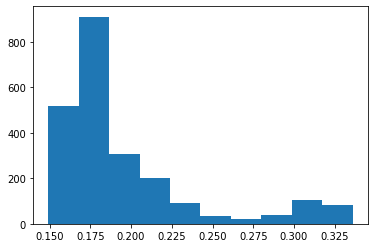

In [27]:
#ploting histograms to see if the data follows normal distibution
plt.hist(X_scaled[50])
plt.show()

In [28]:
#we also tried the GaussianNB to see its results even though we knew that the MultinominalNB fits our model best
classifier_ga = GaussianNB() #initialize classifier_ga as a GaussianNB()
classifier_ml = MultinomialNB() #initialize classifier_ml as a MultinomialNB()
#train the model with classifier_ga
classifier_ga.fit(X_train,y_train)
#test the model with classifier_ga
y_pred_ga = classifier_ga.predict(X_test)
cm = confusion_matrix(y_test,y_pred_ga)

In [29]:
cm #confusion matrix 

array([[ 5,  3, 29,  0,  0,  1,  6,  3,  0,  1],
       [ 8,  4, 26,  0,  0,  2,  2,  3,  0,  3],
       [ 1,  1, 40,  0,  0,  0,  0,  6,  0,  0],
       [ 3, 10,  7, 19,  1,  0,  0,  7,  1,  0],
       [ 1,  4, 15,  1, 10,  5,  3,  7,  0,  2],
       [ 0,  2,  9,  0,  4, 27,  1,  3,  0,  2],
       [ 2, 11,  1,  1,  0,  1, 28,  0,  2,  2],
       [ 3,  0, 11,  1,  0,  0,  6, 27,  0,  0],
       [ 3,  4, 17,  0,  2,  3,  8,  0,  6,  5],
       [ 0, 15,  9,  0,  0,  0,  5,  6,  0, 13]], dtype=int64)

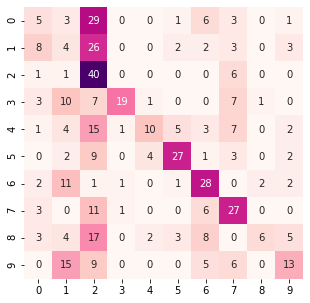

In [30]:
#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [31]:
#classidication report
print(classification_report(y_test,y_pred_ga))

              precision    recall  f1-score   support

           0       0.19      0.10      0.14        48
           1       0.07      0.08      0.08        48
           2       0.24      0.83      0.38        48
           3       0.86      0.40      0.54        48
           4       0.59      0.21      0.31        48
           5       0.69      0.56      0.62        48
           6       0.47      0.58      0.52        48
           7       0.44      0.56      0.49        48
           8       0.67      0.12      0.21        48
           9       0.46      0.27      0.34        48

    accuracy                           0.37       480
   macro avg       0.47      0.37      0.36       480
weighted avg       0.47      0.37      0.36       480



In [32]:
# ten fold cross validation
# scoring='precision' , scoring='recall' , scoring='f1'
accuracy = cross_val_score(estimator = classifier_ga, X = X_scaled, y = y, cv =10)

In [33]:
#accuracy.mean after running the model for 10 times 
accuracy.mean()

0.3720833333333333

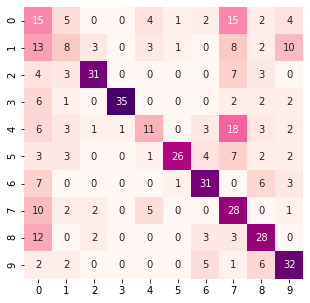

In [34]:
#train the model with classifier_ml
classifier_ml.fit(X_train,y_train)
#test the model with classifier_ml
y_pred_ml = classifier_ml.predict(X_test)
cm_ml = confusion_matrix(y_test,y_pred_ml)

#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm_ml,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [35]:
#classidication report
print(classification_report(y_test,y_pred_ml))

              precision    recall  f1-score   support

           0       0.19      0.31      0.24        48
           1       0.30      0.17      0.21        48
           2       0.79      0.65      0.71        48
           3       0.97      0.73      0.83        48
           4       0.46      0.23      0.31        48
           5       0.90      0.54      0.68        48
           6       0.65      0.65      0.65        48
           7       0.31      0.58      0.41        48
           8       0.52      0.58      0.55        48
           9       0.57      0.67      0.62        48

    accuracy                           0.51       480
   macro avg       0.57      0.51      0.52       480
weighted avg       0.57      0.51      0.52       480



In [36]:
# ten fold cross validation
# scoring='precision' , scoring='recall' , scoring='f1'
accuracy = cross_val_score(estimator = classifier_ml, X = X_scaled, y = y, cv =10)

In [37]:
#accuracy.mean after running the model for 10 times 
accuracy.mean()

0.5175000000000001

In [38]:
#taking the best k features of each class and add them in columns which is an array of arrays
best = [2, 5 ,10]
columns = []
cols =[]

#all the images that belong to the class that we want to take its k-best features are in class0 and all the other images are in class1
for x in range (0,10):
    file_name = "y_train_smpl_" + str(x) + ".csv" #find the name of each class' binary csv
    df_class = pd.read_csv(file_name) #read each class' binary csv as dataframe
    df_class.columns = ['class'] #rename the header of each class' binary csv as 'class'
    df_concatBinary = pd.concat([df_features,df_class],axis=1) #concatinate the features dataframe with the class' binary dataframe 
    class_ = len(df_concat[df_concat['class']==0]) #set the length of the sample we're taking to the number of instances in that class 
    index_class_non = df_concatBinary[df_concatBinary['class']==1].index #take all the images from class1
    random_class_non_indices = np.random.choice(index_class_non, class_, replace=False) #take a random sample of indices from class1 images equal to class0 length
    indices_class = df_concatBinary[df_concatBinary['class']==0].index #take class0 indices
    indices_combined_class = np.concatenate([indices_class, random_class_non_indices]) #create an array with equal indices from class0 & class1
    df_balanced_class = df_concatBinary.loc[indices_combined_class] #take a dataframe with only these indices
    df_balanced_class.reset_index(inplace = True) #reset indices 
    dataset_class = df_balanced_class.drop(['index'],axis=1) #drop the index column from the new dataframe
                                                                       
    dataset_class = dataset_class.sample(frac=1).reset_index(drop=True) #this randomises the dataframe
                                                
    
    #select k best features
    X = dataset_class.iloc[:,:-1] #we drop the last value which is the class to create a features dataframe
    y = dataset_class.iloc[:,2304] #we keep only the last value to create a class dataframe


    for value in best:
        selector = SelectKBest(f_regression, k=value) #initialize selector as SelectKBest() with the f_regression
        selector.fit(X,y) #use the selector in our model
        cols_int = selector.get_support(indices=True) #take an array of headers fot the k-best features as integers
        cols_str = list(map(str,cols_int)) #transform integers to strings
        columns.append(cols_str) #add the headers in an array of arrays


In [39]:
top2 = []
top5 = []
top10 = []

for x in range(0,30): #place the header arrays into individual dataframes to allow analysis
    if x%3 == 0:
        top2.append(columns[x])    
    elif x%3 == 1:
        top5.append(columns[x])
    else:
        top10.append(columns[x])

columns

[['1171', '1172'],
 ['1171', '1172', '1220', '1468', '1472'],
 ['1123',
  '1171',
  '1172',
  '1220',
  '1221',
  '1468',
  '1469',
  '1472',
  '1518',
  '1519'],
 ['1046', '1094'],
 ['998', '1046', '1094', '1142', '1714'],
 ['997',
  '998',
  '1046',
  '1094',
  '1142',
  '1143',
  '1172',
  '1190',
  '1714',
  '1761'],
 ['1083', '1084'],
 ['1036', '1083', '1084', '1131', '1132'],
 ['1035',
  '1036',
  '1081',
  '1082',
  '1083',
  '1084',
  '1130',
  '1131',
  '1132',
  '1179'],
 ['1272', '1649'],
 ['1272', '1369', '1417', '1649', '1696'],
 ['1224',
  '1272',
  '1320',
  '1321',
  '1369',
  '1417',
  '1648',
  '1649',
  '1696',
  '1697'],
 ['1848', '1849'],
 ['1237', '1801', '1848', '1849', '1850'],
 ['1043',
  '1237',
  '1285',
  '1800',
  '1801',
  '1802',
  '1848',
  '1849',
  '1850',
  '1897'],
 ['1319', '1367'],
 ['1270', '1271', '1319', '1367', '1368'],
 ['1222',
  '1270',
  '1271',
  '1318',
  '1319',
  '1320',
  '1367',
  '1368',
  '1415',
  '1416'],
 ['1186', '1738'],
 ['118

In [40]:
top5

[['1171', '1172', '1220', '1468', '1472'],
 ['998', '1046', '1094', '1142', '1714'],
 ['1036', '1083', '1084', '1131', '1132'],
 ['1272', '1369', '1417', '1649', '1696'],
 ['1237', '1801', '1848', '1849', '1850'],
 ['1270', '1271', '1319', '1367', '1368'],
 ['1186', '1689', '1738', '1786', '1787'],
 ['1119', '1120', '1121', '1168', '1169'],
 ['1232', '1280', '1328', '1375', '1470'],
 ['1362', '1363', '1364', '1410', '1411']]

In [41]:
top10

[['1123',
  '1171',
  '1172',
  '1220',
  '1221',
  '1468',
  '1469',
  '1472',
  '1518',
  '1519'],
 ['997',
  '998',
  '1046',
  '1094',
  '1142',
  '1143',
  '1172',
  '1190',
  '1714',
  '1761'],
 ['1035',
  '1036',
  '1081',
  '1082',
  '1083',
  '1084',
  '1130',
  '1131',
  '1132',
  '1179'],
 ['1224',
  '1272',
  '1320',
  '1321',
  '1369',
  '1417',
  '1648',
  '1649',
  '1696',
  '1697'],
 ['1043',
  '1237',
  '1285',
  '1800',
  '1801',
  '1802',
  '1848',
  '1849',
  '1850',
  '1897'],
 ['1222',
  '1270',
  '1271',
  '1318',
  '1319',
  '1320',
  '1367',
  '1368',
  '1415',
  '1416'],
 ['1138',
  '1185',
  '1186',
  '1689',
  '1737',
  '1738',
  '1786',
  '1787',
  '1885',
  '1934'],
 ['1071',
  '1072',
  '1119',
  '1120',
  '1121',
  '1167',
  '1168',
  '1169',
  '1216',
  '1217'],
 ['1232',
  '1280',
  '1328',
  '1375',
  '1376',
  '1423',
  '1469',
  '1470',
  '1471',
  '1518'],
 ['1317',
  '1318',
  '1362',
  '1363',
  '1364',
  '1365',
  '1410',
  '1411',
  '1412',
  '

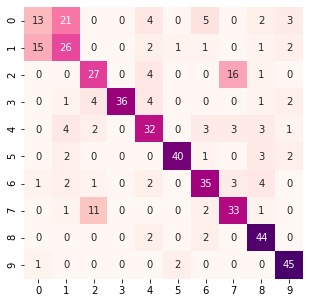

In [42]:


A = dataset_big #take the original FULL dataframe
top2X = pd.DataFrame() #create an empty dataframe for storing the top 2 correlated pixels
top5X = pd.DataFrame() #create an empty dataframe for storing the top 5 correlated pixels
top10X = pd.DataFrame() #create an empty dataframe for storing the top 10 correlated pixels

for val in top2:   #take array for each class containing two pixel labels
    for x in val:       #take the 2 ints from each val array
        column = A[str(x)]    # find the column of values corresponding to that pixel
        top2X[str(x)] = column    # add that column to the new dataframe with the same label
top2X['class'] = A.iloc[:,2304].values    #adding the class colum to the completed dataframe

for val in top5:   #take array for each class containing two pixel labels
    for x in val:       #take the 2 ints from each val array
        column = A[str(x)]    # find the column of values corresponding to that pixel
        top5X[str(x)] = column    # add that column to the new dataframe with the same label
top5X['class'] = A.iloc[:,2304].values    #adding the class colum to the completed dataframe

for val in top10:   #take array for each class containing two pixel labels
    for x in val:       #take the 2 ints from each val array
        column = A[str(x)]    # find the column of values corresponding to that pixel
        top10X[str(x)] = column    # add that column to the new dataframe with the same label
top10X['class'] = A.iloc[:,2304].values    #adding the class colum to the completed dataframe

X2 = top2X.iloc[:,:-1].values     #we drop the last value which is the class to create a features dataframe
Y2 = top2X.iloc[:,20].values    #we keep only the last value to create a class dataframe
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, stratify=Y2) #creating testing and training sets

#train the model with classifier_ml
classifier_ml.fit(X_train,y_train)
#test the model with classifier_ml
y_pred_ml = classifier_ml.predict(X_test)
cm_ml = confusion_matrix(y_test,y_pred_ml)

#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm_ml,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()


In [43]:
print(classification_report(y_test,y_pred_ml))

              precision    recall  f1-score   support

           0       0.43      0.27      0.33        48
           1       0.46      0.54      0.50        48
           2       0.60      0.56      0.58        48
           3       1.00      0.75      0.86        48
           4       0.64      0.67      0.65        48
           5       0.93      0.83      0.88        48
           6       0.71      0.73      0.72        48
           7       0.60      0.69      0.64        48
           8       0.73      0.92      0.81        48
           9       0.82      0.94      0.87        48

    accuracy                           0.69       480
   macro avg       0.69      0.69      0.68       480
weighted avg       0.69      0.69      0.68       480



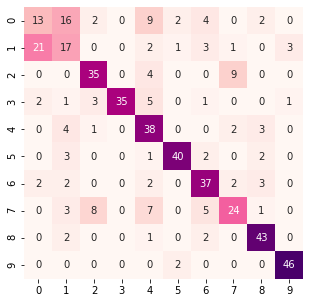

In [44]:
X5 = top5X.iloc[:,:-1].values     #we drop the last value which is the class to create a features dataframe
Y5 = top5X.iloc[:,50].values    #we keep only the last value to create a class dataframe
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, stratify=Y2) #creating testing and training sets

#train the model with classifier_ml
classifier_ml.fit(X_train,y_train)
#test the model with classifier_ml
y_pred_ml = classifier_ml.predict(X_test)
cm_ml = confusion_matrix(y_test,y_pred_ml)

#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm_ml,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [45]:
print(classification_report(y_test,y_pred_ml))


              precision    recall  f1-score   support

           0       0.34      0.27      0.30        48
           1       0.35      0.35      0.35        48
           2       0.71      0.73      0.72        48
           3       1.00      0.73      0.84        48
           4       0.55      0.79      0.65        48
           5       0.89      0.83      0.86        48
           6       0.69      0.77      0.73        48
           7       0.63      0.50      0.56        48
           8       0.80      0.90      0.84        48
           9       0.92      0.96      0.94        48

    accuracy                           0.68       480
   macro avg       0.69      0.68      0.68       480
weighted avg       0.69      0.68      0.68       480



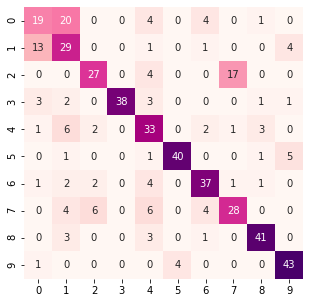

In [46]:
X10 = top10X.iloc[:,:-1].values     #we drop the last value which is the class to create a features dataframe
Y10 = top10X.iloc[:,95].values    #we keep only the last value to create a class dataframe
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, stratify=Y2) #creating testing and training sets

#train the model with classifier_ml
classifier_ml.fit(X_train,y_train)
#test the model with classifier_ml
y_pred_ml = classifier_ml.predict(X_test)
cm_ml = confusion_matrix(y_test,y_pred_ml)

#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm_ml,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [47]:
print(classification_report(y_test,y_pred_ml))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44        48
           1       0.43      0.60      0.50        48
           2       0.73      0.56      0.64        48
           3       1.00      0.79      0.88        48
           4       0.56      0.69      0.62        48
           5       0.91      0.83      0.87        48
           6       0.76      0.77      0.76        48
           7       0.60      0.58      0.59        48
           8       0.85      0.85      0.85        48
           9       0.81      0.90      0.85        48

    accuracy                           0.70       480
   macro avg       0.71      0.70      0.70       480
weighted avg       0.71      0.70      0.70       480

